--- Initial State ---


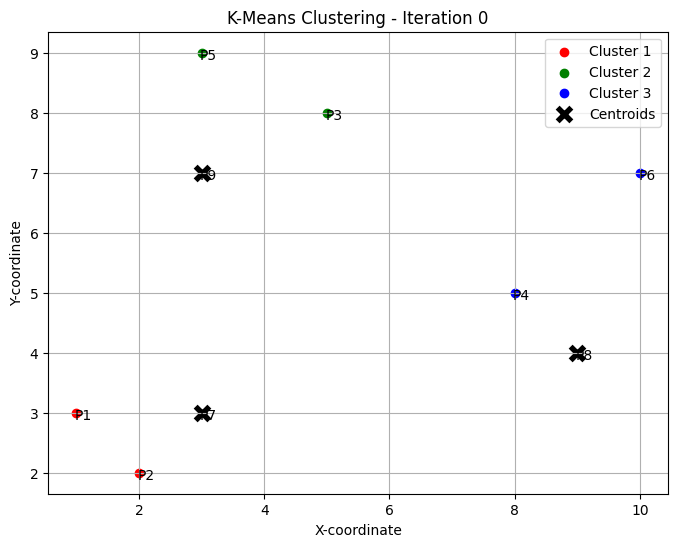


--- Iteration 1 Results ---
New Centroids:
C1: [2.         2.66666667]
C2: [3.66666667 8.        ]
C3: [9.         5.33333333]


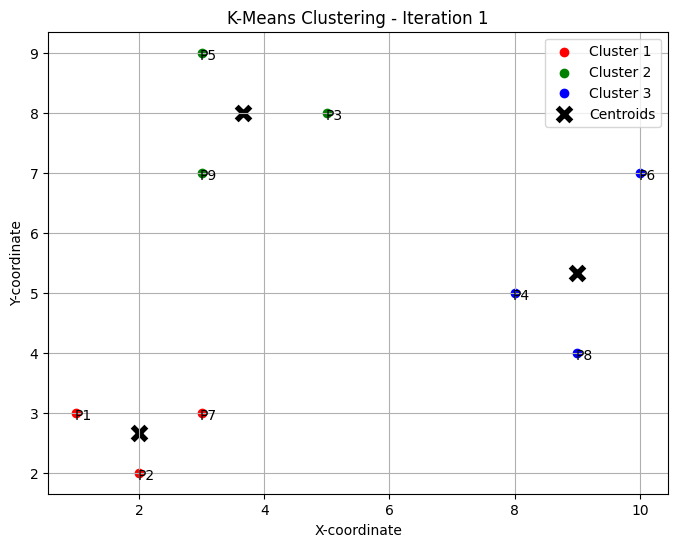


--- Iteration 2 Results ---
New Centroids:
C1: [2.         2.66666667]
C2: [3.66666667 8.        ]
C3: [9.         5.33333333]


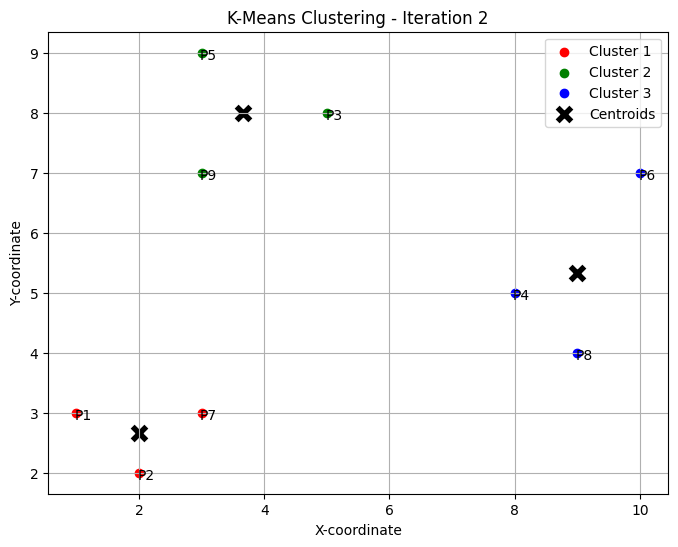

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
points = np.array([
    [1, 3], [2, 2], [5, 8], [8, 5], [3, 9],
    [10, 7], [3, 3], [9, 4], [3, 7]
])
point_labels = [f'P{i+1}' for i in range(len(points))]
K = 3
centroids = np.array([
    points[6],  # C1 = P7(3, 3)
    points[8],  # C2 = P9(3, 7)
    points[7]   # C3 = P8(9, 4)
])
def euclidean_distance(a, b):
    """Computes the Euclidean distance between two points."""
    return np.sqrt(np.sum((a - b)**2))

def assign_clusters(data, centroids):
    """Assigns each data point to the nearest centroid."""
    assignments = []
    distances = []
    for point in data:
        dist_to_centroids = [euclidean_distance(point, c) for c in centroids]
        assignments.append(np.argmin(dist_to_centroids))
        distances.append(dist_to_centroids)
    return np.array(assignments), np.array(distances)

def update_centroids(data, assignments, K):
    """Calculates the new mean center for each cluster."""
    new_centroids = []
    for k in range(K):
        cluster_points = data[assignments == k]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            new_centroids.append(centroids[k])
    return np.array(new_centroids)
def plot_clusters(data, assignments, centroids, iteration):
    """Plots the points, centroids, and cluster assignments."""
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(K):
        cluster_points = data[assignments == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='X', s=200, c='k', label='Centroids', edgecolor='w')
    for i, txt in enumerate(point_labels):
        plt.annotate(txt, (data[i, 0], data[i, 1]), textcoords="offset points", xytext=(5,-5), ha='center')

    plt.title(f'K-Means Clustering - Iteration {iteration}')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()
print("--- Initial State ---")
assignments_0, _ = assign_clusters(points, centroids)
plot_clusters(points, assignments_0, centroids, 0)
assignments_1, _ = assign_clusters(points, centroids)
centroids_1 = update_centroids(points, assignments_1, K)
print(f"\n--- Iteration 1 Results ---")
print(f"New Centroids:\nC1: {centroids_1[0]}\nC2: {centroids_1[1]}\nC3: {centroids_1[2]}")
centroids = centroids_1 # Update centroids for the next iteration
plot_clusters(points, assignments_1, centroids_1, 1)
assignments_2, _ = assign_clusters(points, centroids)
centroids_2 = update_centroids(points, assignments_2, K)
print(f"\n--- Iteration 2 Results ---")
print(f"New Centroids:\nC1: {centroids_2[0]}\nC2: {centroids_2[1]}\nC3: {centroids_2[2]}")
centroids = centroids_2 # Final centroids
plot_clusters(points, assignments_2, centroids_2, 2)

--- K-Means with New Point P10(6, 2) and K=3 ---
P10(6, 2) joined Cluster: 2
Final Centroid Locations:
[[9.         5.33333333]
 [3.         2.5       ]
 [3.66666667 8.        ]]


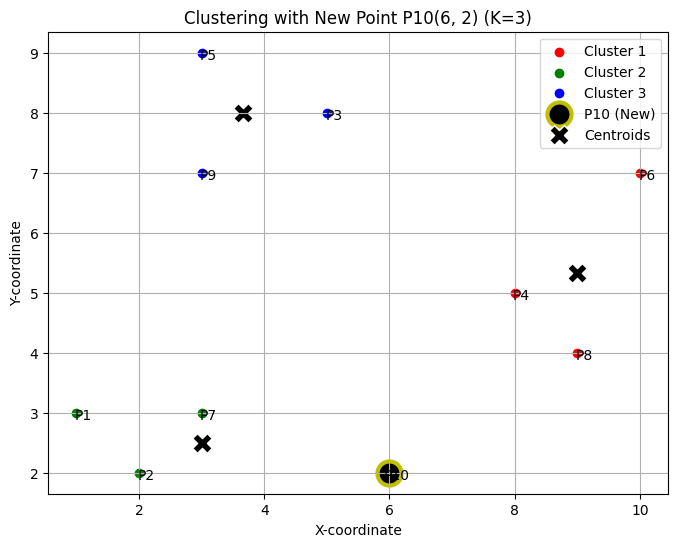


--- Centroid Shift Analysis ---
P10(6, 2) joined Cluster 2.
The centroid of the cluster P10 joined (Cluster 1) shifted towards P10's coordinates (6, 2), as the mean of its members is now calculated with a new point pulling it closer to the lower right region.


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Original 9 points
points_original = np.array([
    [1, 3], [2, 2], [5, 8], [8, 5], [3, 9],
    [10, 7], [3, 3], [9, 4], [3, 7]
])

# New point P10(6, 2)
P10 = np.array([6, 2])
points_new = np.vstack([points_original, P10])
point_labels_new = [f'P{i+1}' for i in range(len(points_new))]
K = 3

# Run K-Means on the 10 points
kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto')
kmeans.fit(points_new)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Identification and Comparison
P10_cluster = labels[-1]
cluster_counts = np.bincount(labels)

print(f"--- K-Means with New Point P10(6, 2) and K=3 ---")
print(f"P10(6, 2) joined Cluster: {P10_cluster + 1}")
print(f"Final Centroid Locations:\n{centroids}")

# Comparing with K=3 from Question 2:
# Q2 K=3 centroids (approx): C1(2.2, 5.2), C2(9, 5.3), C3(5, 8.5)
# New Centroids: The P10 point (low X, low Y) will pull the closest centroid (likely C1) down and to the right.

# Plotting
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']

for i in range(K):
    cluster_points = points_new[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[i], label=f'Cluster {i+1}')

# Highlight P10
plt.scatter(P10[0], P10[1], marker='o', s=300, c='k', edgecolor='y', linewidth=3, label='P10 (New)')

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, c='k', label='Centroids', edgecolor='w')

# Label all points
for i, txt in enumerate(point_labels_new):
    plt.annotate(txt, (points_new[i, 0], points_new[i, 1]), textcoords="offset points", xytext=(5,-5), ha='center')

plt.title('Clustering with New Point P10(6, 2) (K=3)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()
#

print("\n--- Centroid Shift Analysis ---")
print(f"P10(6, 2) joined Cluster {P10_cluster + 1}.")
print("The centroid of the cluster P10 joined (Cluster 1) shifted towards P10's coordinates (6, 2), as the mean of its members is now calculated with a new point pulling it closer to the lower right region.")

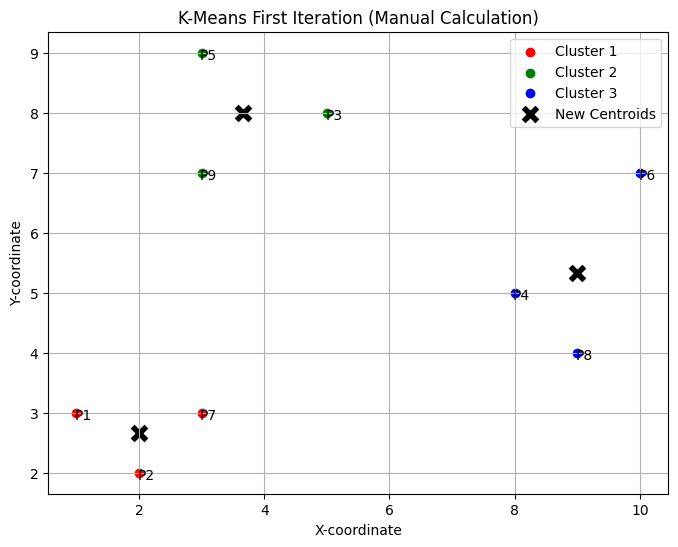

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data and First Iteration Results
points = np.array([
    [1, 3], [2, 2], [5, 8], [8, 5], [3, 9],
    [10, 7], [3, 3], [9, 4], [3, 7]
])
point_labels = [f'P{i+1}' for i in range(len(points))]
K = 3

# Assignments from the manual table calculation (0=C1, 1=C2, 2=C3)
assignments_1_manual = np.array([0, 0, 1, 2, 1, 2, 0, 2, 1])

# New Centroids from manual calculation
centroids_1_manual = np.array([
    [2.0, 8/3],      # C1 (2.0, 2.67)
    [11/3, 8.0],     # C2 (3.67, 8.0)
    [9.0, 16/3]      # C3 (9.0, 5.33)
])

# --- Plotting ---
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']

# Plot data points based on manual assignments
for i in range(K):
    cluster_points = points[assignments_1_manual == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[i], label=f'Cluster {i+1}')

# Plot new centroids
plt.scatter(centroids_1_manual[:, 0], centroids_1_manual[:, 1],
            marker='X', s=200, c='k', label='New Centroids', edgecolor='w')

# Label all points
for i, txt in enumerate(point_labels):
    plt.annotate(txt, (points[i, 0], points[i, 1]), textcoords="offset points", xytext=(5,-5), ha='center')

plt.title('K-Means First Iteration (Manual Calculation)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()
#